In [35]:
import numpy as np
import matplotlib.pyplot as plt

In [36]:
def left_mul(pi, M, iteration, debug = False):
    for i in range(iteration):
        if(debug):
            print("iteration: "+str(i)+" "+ str(pi))
        pi = np.dot(pi.T, M)
        #pi = pi.T
        pi = pi/np.sqrt(np.dot(pi,pi.T))
    return pi

def right_mul(pi, M, iteration, debug = False):
    for i in range(iteration):
        if(debug):
            print("iteration: "+str(i)+" "+ str(pi))
        pi = np.dot(M,pi)
        #pi = pi.T
        pi = pi/np.sqrt(np.dot(pi,pi.T))
    return pi

### 注意到矩阵的特性： 方阵，每一行加起来都等于1

### 如果我们把网页“分数”的传递理解成“概率”的转移，这就是一个马尔可夫过程。

### 很多网页指向网页i = 很多网页包含i的超链接 = i网页的评分 =用户有很大可能性通过这些链接去到网页i = 转移概率

### “收敛”，其实就指的是在满足一定条件的情况下，马尔可夫过程将达到一个均衡。

### 根据马尔可夫收敛定理(Markov Convergence Theorem)，满足以下条件，马尔可夫过程会收敛。

#### 一、可能的状态数量是有限的。

#### 二、转移概率固定不变。

#### 三、从任意一个状态能够变到任意其他一个状态。(第一步修正)

#### 四、过程不是简单循环。比如不能是从全A变到全B，然后又自动从全B变到全A。(第二步修正)

# Question 1

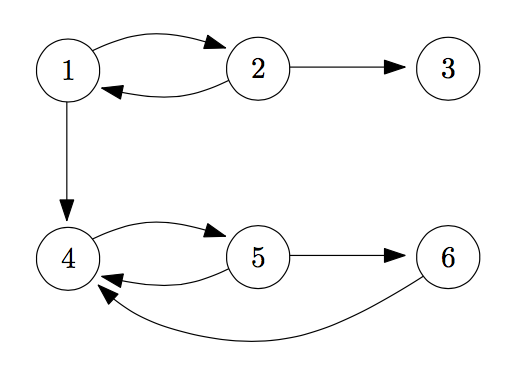

In [57]:
links = [[1,2],[1,4],[2,1],[2,3],[4,5],[5,4],[5,6],[6,4]]
degree = []
for i in range(1,7):
    cnt = 0
    for link in links:
        if link[0] == i:
            cnt+=1
    degree.append(cnt)
G = np.zeros((6,6))
for link in links:
    G[link[0]-1][link[1]-1] = 1.0/degree[link[0]-1]
    
print(G)
print("")

print("left")
pi = np.array([1.0/6,1.0/6,1.0/6,1.0/6,1.0/6,1.0/6])
pi = left_mul(pi, G, 100, debug = False)
print(pi)
pi = np.array([1.0/3,1.0/3,1.0/3,0,0,0])
pi = left_mul(pi, G, 1000, debug = False)
print(pi)
print("")

print("right")
pi = np.array([1.0/6,1.0/6,1.0/6,1.0/6,1.0/6,1.0/6])
pi = right_mul(pi, G, 100, debug = False)
print(pi)
pi = np.array([1.0/3,1.0/3,1.0/3,0,0,0])
pi = right_mul(pi, G, 100, debug = False)
print(pi)
print("")

print("eigen")
eigen_val, eigen_vec = np.linalg.eig(G)
print(eigen_val)
print(eigen_vec.T[0])

[[ 0.   0.5  0.   0.5  0.   0. ]
 [ 0.5  0.   0.5  0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   1.   0. ]
 [ 0.   0.   0.   0.5  0.   0.5]
 [ 0.   0.   0.   1.   0.   0. ]]

left
[  3.28692044e-31   3.28692044e-31   3.28692044e-31   6.66666667e-01
   6.66666667e-01   3.33333333e-01]
[  1.55543936e-301   1.55543936e-301   1.55543936e-301   6.66666667e-001
   6.66666667e-001   3.33333333e-001]

right
[ 0.35355339  0.1767767   0.          0.53033009  0.53033009  0.53033009]
[ 0.89442719  0.4472136   0.          0.          0.          0.        ]

eigen
[ 0.5+0.j  -0.5+0.j  -0.5+0.5j -0.5-0.5j  1.0+0.j   0.0+0.j ]
[ 0.70710678+0.j  0.70710678+0.j  0.00000000+0.j  0.00000000+0.j
  0.00000000+0.j  0.00000000+0.j]


###  结论：无法处理这样的无出度节点，那么就强迫此节点向网络中的每个节点发送“1/n”
###  “在没有链接的网页中，用户浏览完毕就会关掉，随机进入其他网页进行浏览”

## 这样做使马尔可夫过程满足了第三个条件：从任意一个状态能变到其他一个任意状态。

# Question 2

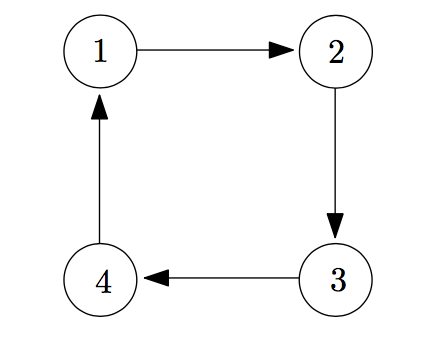

In [54]:
links = [[1,2],[2,3],[3,4],[4,1]]
degree = []
for i in range(1,5):
    cnt = 0
    for link in links:
        if link[0] == i:
            cnt+=1
    degree.append(cnt)

H = np.zeros((4,4))
for link in links:
    H[link[0]-1][link[1]-1] = 1.0/degree[link[0]-1]
print(H)
print("")

print("left")
pi = np.array([1.0/2, 1.0/2, 0, 0])
pi = left_mul(pi, H, 1000, debug = False)
print(pi)
pi = np.array([0,0,1.0/2, 1.0/2])
pi = left_mul(pi, H, 1000, debug = False)
print(pi)
pi = np.array([1/4.0,1/4.0,1.0/4, 1.0/4])
pi = left_mul(pi, H, 1000, debug = False)
print(pi)
print("")

print("right")
pi = np.array([1.0/2, 1.0/2, 0, 0])
pi = right_mul(pi, H, 1000, debug = False)
print(pi)
pi = np.array([0,0,1.0/2, 1.0/2])
pi = right_mul(pi, H, 1000, debug = False)
print(pi)
pi = np.array([1/4.0,1/4.0,1.0/4, 1.0/4])
pi = right_mul(pi, H, 1000, debug = False)
print(pi)
print("")

print("eigen")
eigen_val, eigen_vec = np.linalg.eig(H)
print(eigen_val)
print(eigen_vec.T[0])
print("")

theta = 0.85
G = theta*H + (1-theta)*(1.0/4)*np.dot(np.ones(4),np.ones(4).T)
print(G)
print("left")
pi = np.array([1.0/2, 1.0/2, 0, 0])
pi = left_mul(pi, G, 1000, debug = False)
print(pi)
pi = np.array([0,0,1.0/2, 1.0/2])
pi = left_mul(pi, G, 1000, debug = False)
print(pi)
pi = np.array([1/4.0,1/4.0,1.0/4, 1.0/4])
pi = left_mul(pi, G, 1000, debug = False)
print(pi)
print("")

print("right")
pi = np.array([1.0/2, 1.0/2, 0, 0])
pi = right_mul(pi, G, 1000, debug = False)
print(pi)
pi = np.array([0,0,1.0/2, 1.0/2])
pi = right_mul(pi, G, 1000, debug = False)
print(pi)
pi = np.array([1/4.0,1/4.0,1.0/4, 1.0/4])
pi = right_mul(pi, G, 1000, debug = False)
print(pi)
print("")

print("eigen")
eigen_val, eigen_vec = np.linalg.eig(H)
print(eigen_val)
print(eigen_vec.T[0])
print("")

[[ 0.  1.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0.  1.]
 [ 1.  0.  0.  0.]]

left
[ 0.70710678  0.70710678  0.          0.        ]
[ 0.          0.          0.70710678  0.70710678]
[ 0.5  0.5  0.5  0.5]

right
[ 0.70710678  0.70710678  0.          0.        ]
[ 0.          0.          0.70710678  0.70710678]
[ 0.5  0.5  0.5  0.5]

eigen
[ -1.00000000e+00+0.j   8.32667268e-17+1.j   8.32667268e-17-1.j
   1.00000000e+00+0.j]
[-0.5+0.j  0.5+0.j -0.5+0.j  0.5+0.j]

[[ 0.15  1.    0.15  0.15]
 [ 0.15  0.15  1.    0.15]
 [ 0.15  0.15  0.15  1.  ]
 [ 1.    0.15  0.15  0.15]]
left
[ 0.5  0.5  0.5  0.5]
[ 0.5  0.5  0.5  0.5]
[ 0.5  0.5  0.5  0.5]

right
[ 0.5  0.5  0.5  0.5]
[ 0.5  0.5  0.5  0.5]
[ 0.5  0.5  0.5  0.5]

eigen
[ -1.00000000e+00+0.j   8.32667268e-17+1.j   8.32667268e-17-1.j
   1.00000000e+00+0.j]
[-0.5+0.j  0.5+0.j -0.5+0.j  0.5+0.j]



### 结论：这是一个满秩矩阵，但并不收敛，但左乘结果等于右乘，初始状态影响最终结果。
## 第二步修正，使马尔可夫过程满足了第四个条件：不是一个简单的循环。因此修正后pi\*收敛。
## 同样这样的修正也能使马尔可夫过程满足第三个条件

# Question 3： 对不同的theta值，你能观察到什么结果？

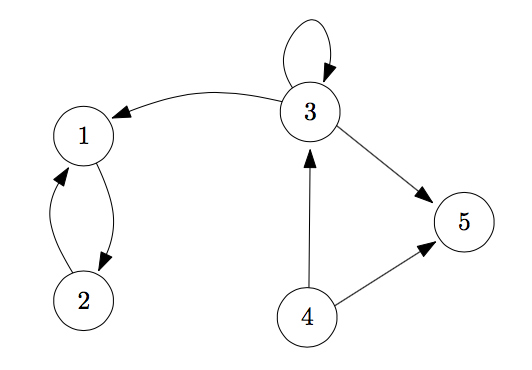

In [52]:
thetas = [0.1,0.3,0.5,0.85,0.9,0.99,0.999]

links = [[1,2],[2,1],[3,3],[3,1],[3,5],[4,3],[4,5]]
degree = []
for i in range(1,6):
    cnt = 0
    for link in links:
        if link[0] == i:
            cnt+=1
    degree.append(cnt)
H = np.zeros((5,5))
for link in links:
    H[link[0]-1][link[1]-1] = 1.0/degree[link[0]-1]
print(H)
print("")

print("pi[0] = "+str(np.array([1.0/5, 1.0/5, 1.0/5, 1.0/5, 1.0/5])))
for theta in thetas:
    G = theta*H + (1-theta)*(1.0/5)*np.dot(np.ones(5),np.ones(5).T)
    pi = np.array([1.0/5, 1.0/5, 1.0/5, 1.0/5, 1.0/5])
    pi = left_mul(pi, G, 100, debug = False)
    print("theta = "+str(theta)+" : "+str(pi))
print("")


print("pi[0] = "+str(np.array([0.1,0.2,0.3,0.2,0.2])))
for theta in thetas:
    G = theta*H + (1-theta)*(1.0/5)*np.dot(np.ones(5),np.ones(5).T)
    pi = np.array([0.1,0.2,0.3,0.2,0.2])
    pi = left_mul(pi, G, 100, debug = False)
    print("theta = "+str(theta)+" : "+str(pi))
print("")

print("pi[0] = "+str(np.array([0.9,0.025,0.025,0.025,0.025])))
for theta in thetas:
    G = theta*H + (1-theta)*(1.0/5)*np.dot(np.ones(5),np.ones(5).T)
    pi = np.array([0.9,0.025,0.025,0.025,0.025])
    pi = left_mul(pi, G, 100, debug = False)
    print("theta = "+str(theta)+" : "+str(pi))
print("")

[[ 0.          1.          0.          0.          0.        ]
 [ 1.          0.          0.          0.          0.        ]
 [ 0.33333333  0.          0.33333333  0.          0.33333333]
 [ 0.          0.          0.5         0.          0.5       ]
 [ 0.          0.          0.          0.          0.        ]]

pi[0] = [ 0.2  0.2  0.2  0.2  0.2]
theta = 0.1 : [ 0.45244829  0.44926142  0.44743583  0.43938261  0.44743583]
theta = 0.3 : [ 0.46674909  0.45568543  0.44697131  0.4182456   0.44697131]
theta = 0.5 : [ 0.49045874  0.46875858  0.44277156  0.3842165   0.44277156]
theta = 0.85 : [ 0.61834283  0.57591441  0.34593401  0.21594921  0.34593401]
theta = 0.9 : [ 0.66025264  0.62215368  0.27623448  0.15614184  0.27623448]
theta = 0.99 : [ 0.70718046  0.70541442  0.03218597  0.01464318  0.03218597]
theta = 0.999 : [ 0.68271462  0.73066987  0.00318469  0.00141867  0.00318469]

pi[0] = [ 0.1  0.2  0.3  0.2  0.2]
theta = 0.1 : [ 0.45244829  0.44926142  0.44743583  0.43938261  0.44743583]


### 观察结果得到的结论： theta值越接近1，相当于没有做第二步修正，
### pi*开始变得“不收敛”，在0.9以下，对于不同的pi[0]，收敛到的pi*都基本一样

### "若阻尼因子theta值靠近1，矩阵的次特征值会随之靠近1，从而会导致pagerank值对theta值的选择敏感依赖，计算特征向量的方法的收敛速度降低"